#  Metric Learning

Задачи **Metric Learning** основаны на измерении расстояния между объектами выборки. Такие задачи могут и не иметь явной и однозначной целевой метки, поэтому *Metric Learning* может использоваться как при обучении с учителем (*supervised learning*), так и без него (*unsupervised learning*).

К основным постановкам задач *Metric Learning* относят задачи кластеризации, задачи поиска ближайших соседей, задачи снижения размерности и частичного восстановления данных. Далее мы постараемся разобрать на примере практическое применение методов для задачи снижения размерности и кластеризации. 

Для начала поговорим поговорим про **расстояния**, которые рассматриваются в задачах Metric Learning. Прежде всего стоит объяснить, что такое расстояние в контексте машинного обучения. 

> Каждый объект выборки можно представить как точку в -мерном пространстве, где  — количество признаков, которые описывают объект. Тогда **расстояние** есть некоторая мера дистанции между объектами в - мерном пространстве (расстояние между n-мерными векторами, описывающими объекты). 

На иллюстрации приведена визуализация объектов, описываемых двухмерным пространством (количество признаков равно двум). Мы можем визуализировать также трехмерное пространство и одномерное, однако размерности выше n >3 визуализировать уже сложно.

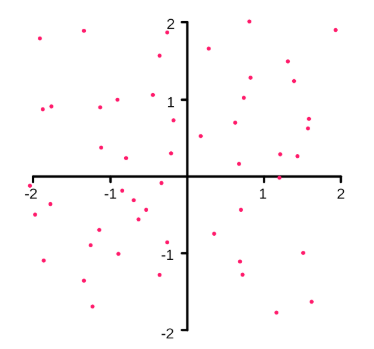

Для понимания расстояния между двумя точками прибегнем к помощи ещё одной иллюстрации:

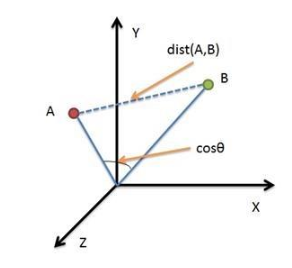

На рисунке представлено расстояние между двумя точками A и Б уже в трёхмерном пространстве и обозначено как *dist(A,B)*.

В данных задачах используется **расстояние Махаланобиса**, обозначаемое далее в формуле как ***D***, между объектами ***x*** и  ***x'*** — объектами выборки, описываемыми признаковым пространством (на практике это будут две строки в датасете длиной, равной количеству признаков), вводимое как:

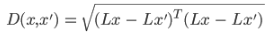

где  ***L*** — матрица преобразования пространства, например понижение размерности.

> **Пример.** Самое простое преобразование пространства, известное ещё со школы — это поворот вокруг одной из осей в трехмерном пространстве на угол **a**. 

В матричном виде преобразование для каждого вектора данного пространства ***x*** в повернутый на угол новый вектор ***x'*** имеет вид: 

***x' = Mx***, где в скалярном виде вектор имеет вид , а матрица поворота вокруг оси  имеет вид:

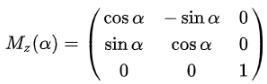

Размерность матрицы ***L*** равна (***m,n***), где ***m*** — размерность преобразованного пространства,  — количество признаков. В случае уменьшения размерности справедливо следующее неравенство:

**m < n**

В частном случае, когда ***L*** представляет  единичную матрицу, то есть изменений пространства нет и используется для расчета исходное, то такое расстояние является Евклидовым расстоянием. Из свойства единичной матрицы имеем для векторного вида евклидового расстояния:

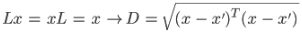

В скалярном виде:

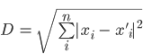

> **Примечание**. Единичной матрицей размера ***n*** называют квадратную матрицу (***n,n***), у которой ненулевые  элементы лежат на главной диагонали и равны единице. Главная диагональ — диагональ матрицы, проведённая из верхнего левого в нижний правый угол.

Также в задачах *Metric Learning* используются альтернативные метрики. Рассмотрим некоторые из них.

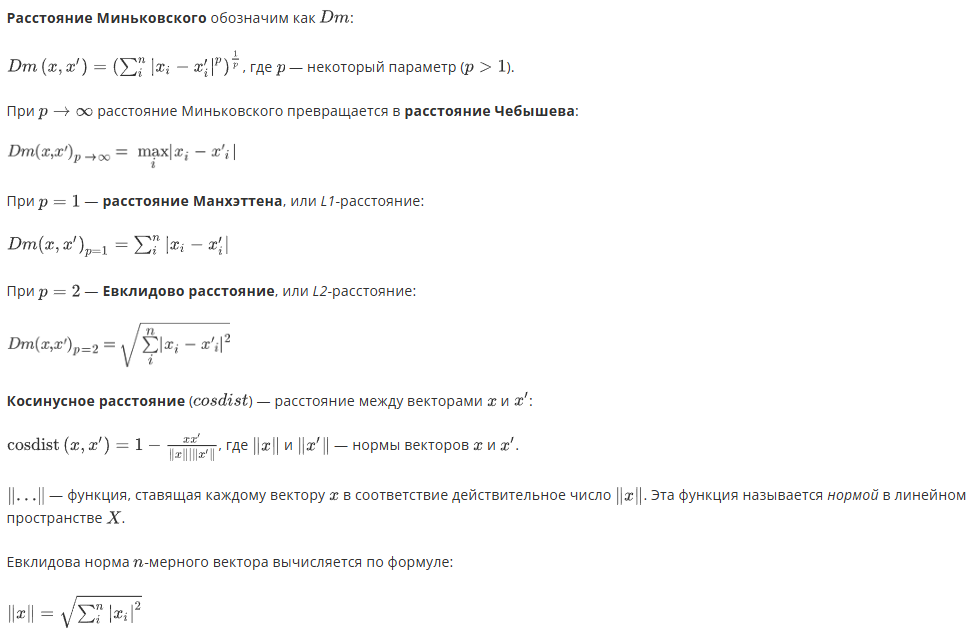

## Метод ближайших соседей. Кластеризация

> Прежде чем перейти к рассмотрению метода решения данных типов задач, необходимо понять спектр практических задач, которые могут быть решены этими подходами. 

В модуле ML-4 мы подробно изучили основные примеры **кластеризации**. Напомним, что с помощью кластеризации можно разделить пользователей магазина на группы схожих между собой покупателей, можно собрать пользователей сайта в группы по интересам. 

Использование кластеризации здесь обусловлено тем, что у нас нет правильных меток, по которым мы можем классифицировать людей. Кроме того, с помощью кластеризации можно определить тему текста или отнести его к определенной тематике, выяснить, является ли отзыв на сайте позитивным или негативным. Кластеризация также часто используется в медицине, особенно в генетике.

> Основная сложность задачи кластеризации заключается в том, что не всегда известно истинное значение количества кластеров — иногда надо это исследовать.

Основным методом решения задачи кластеризации является метод **k-means**, с которым мы познакомились ранее. Далее мы попробуем решить с вами реальную задачу на определение кластеров покупателей, где нам будет необходимо определить количество кластеров.

> Задача **поиска ближайших соседей (k Nearest Neighbours, kNN)** очень схожа с задачей кластеризации. Основное отличие заключается в том, что кластеризация — задача разбиения на кластеры, с последующим описанием и интерпретацией общих черт кластера. В свою очередь, поиск ближайших соседей состоит в определении уже существующего кластера, к которому относится объект. 

Другими словами, поиск ближайших соседей используется для задачи обучения с учителем, где целевые метки предварительно могут быть получены, например, кластеризацией. 

Задачи обучения с учителем, где целевые метки получены в результате кластеризации, называются **слабым обучением с учителем (weak supervised learning).**

Давайте подробнее разберём работу алгоритма. 

## Алгоритм работы k-nearest neighbour (KNN)

- Зададим  ***k*** — количество ближайший соседей, по которым принимается решение.
- Выберем расстояние, по которому будут определяться соседи. Обычно это евклидово расстояние, рассмотренное ранее.
- Обучим модель на признаковом пространстве.

Как было сказано ранее, обучение алгоритма kNN заключается в получении пар признаковое пространство-целевая метка. Далее данные нормализуются с использованием **MinMaxScaler().** Напомним его формулу:

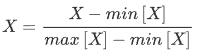

- Получим предсказание модели.


> Предсказание заключается в поиске *k* ближайших соседей на основе метрики, выбранной ранее. Данная модель в sklearn реализована в модуле *sklearn.neighbors* как [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) для задачи классификации и [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) для задачи регрессии. 

Для понимания  работы получения предсказания обратимся к иллюстрации:

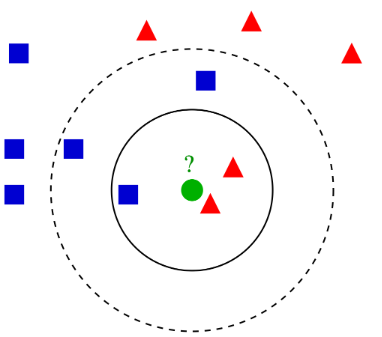

На рисунке представлена задача бинарной классификации с двумя классами (**синие** квадраты и **красные** треугольники). Для нашего объекта, отмеченного **зелёным** кругом, нам нужно определить класс. 

Стоит отметить, что если k = 3 (в sklearn данный параметр главный и называется **n_neighbors**), то в радиус трёх ближайших соседей попадают два **красных** треугольника и один **синий** квадрат (на рисунке это **чёрная** линия). Радиус в модели определяется евклидовым расстоянием от классифицируемого объекта, которое рассчитывается различными методами (в *sklearn* параметр *algorigthm* — см. [параметры алгоритма](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)), в том числе и жадным алгоритмом. Итак, большинство представляют объекты класса красных треугольников, и стоит принять класс нашего объекта за класс красных треугольников. В данном случае вероятность верного определения класса равна 0.66 (2/3). 

Однако, если изначально k = 5, то в этом радиусе пятью ближайшими соседями (отмечено **чёрным пунктиром**) являются уже три **синих** квадрата и два **красных** треугольника. Тогда класс объекта определяется как наиболее часто встречаемый класс среди соседей, и объект, вероятнее всего, принадлежит квадратам — в данном случае с вероятностью 0.6, если при предсказании не учитывать расстояние. В случае учёта расстояния (параметр weights, значение distance) при k=5 может случиться так, что наш объект будет классифицирован как **красный** треугольник, так как у этих двух объектов будет больший вес по причине сильной близости к объекту.

Итак, в ходе данного примера мы узнали смысл некоторых параметров **KNeighborsClassifier**. Давайте подробнее разберём все параметры модели:

- n_neighbors — количество  соседей, по умолчанию 5.

- **weights{'uniform', 'distance'}** — вес объекта в зависимости от удаленности от объекта. Как говорилось ранее, если uniform, то расстояние не будет учитываться в подсчёте вероятности для классификации. По умолчанию оно не учитывается, параметр имеет значение 'uniform'. При 'distance' расстояние учитывается.

- **algorithm** — алгоритм, используемый при подсчёте расстояния.
    1. 'ball_tree' использует BallTree.
    2. 'kd_tree' использует  KDTree.
    3. 'brute' использует жадный алгоритм.
    4. 'auto' выбирает оптимальный из вышепредставленных.

- **leaf_size** — параметр для поиска расстояния BallTree или KDTree. По умолчанию равен 30.

- **p** — значение p-метрики Миньковского. Как мы знаем, **p = 1** — расстояние Манхэттена (L1), **p = 2** — Евклидово расстояние (L2). По умолчанию **p = 2**.

- **metric** — метрика для оценки расстояний, по умолчанию расстояние Миньковского.

- **n_jobs** — количество задач, выполняемых параллельно, ограничено количеством ядер вычислительной машины. При n_jobs=-1 использует все.

Приведём пример: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Сформируем искусственные данные: 

data = pd.DataFrame([[0,0,0],[0.2,0.1,0], [1,0,0], [2,1,1],[2.5,0.9,1], [3,1,1]], columns = ['x','y', 'target'])

In [3]:
# Отделим матрицу признаков и вектор-столбец правильных ответов:

X = data.drop(['target'],axis = 1)
Y = data['target'] 

In [4]:
# Обучим kNN с тремя соседями:

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, Y)

KNeighborsClassifier(n_neighbors=3)

Посмотрим на визуализацию исходных данных и работы модели по классификации точки. Вероятность принадлежности к классу можно вычислить методом **predict_proba()**, а само предсказание — методом **predict**:

In [10]:
np.linspace(0,3,10)

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ])

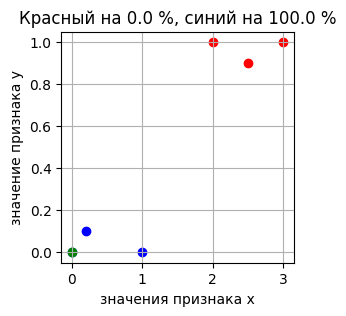

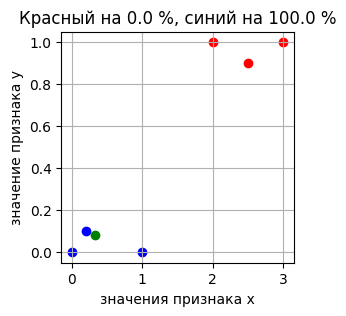

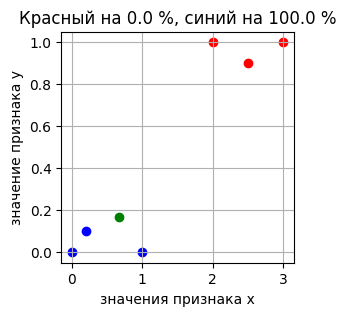

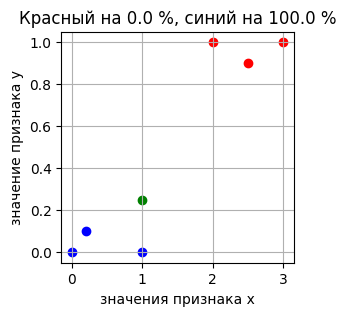

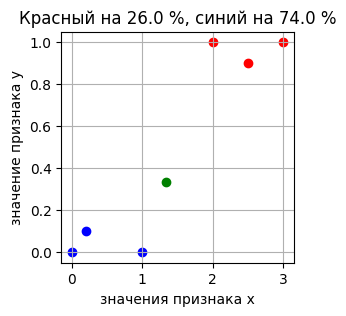

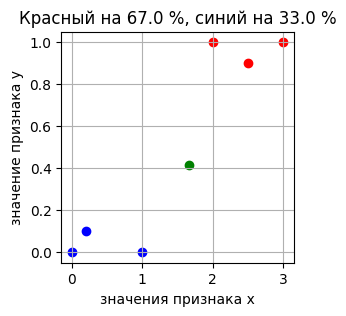

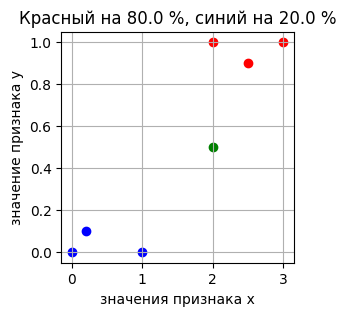

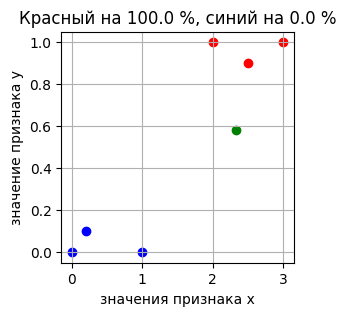

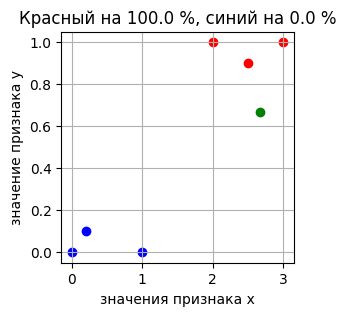

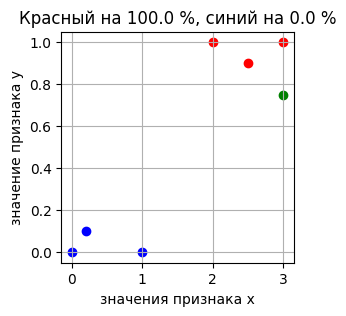

In [12]:
for item in np.linspace(0,3,10):
    x = item
    y = item*0.25
    plt.figure(figsize = (3,3))
    red = data[data.target == 1]
    blue = data[data.target == 0]
    red_prob = round(neigh.predict_proba([[x,y]])[0][1],2)*100 #вероятность принадлежности к красным
    blue_prob = round(neigh.predict_proba([[x,y]])[0][0],2)*100 #вероятность принадлежности к синим
    plt.title(f'Красный на {red_prob} %, синий на {blue_prob} %')
    plt.xlabel('значения признака x')
    plt.ylabel('значение признака y')
    plt.scatter(red.x.values,red.y.values ,c= 'r')
    plt.scatter(blue.x.values,blue.y.values ,c= 'b')
    plt.scatter(x,y ,c= 'g')
    plt.grid()
    plt.show()

Как можно видеть, когда зеленая точка «улетает» из кластера синих точек, вероятность падает, при этом вероятность принадлежности к классу в данном случае может принимать всего четыре значения (0, 0.33, 0.66, 1) в зависимости от количества соседей, так как не учтено расстояние при подсчёте вероятности. 

> Попробуем учесть расстояние. Для этого в модель подадим параметр weights='distance'.

In [13]:
# В коде выше изменим объект модели:

neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh.fit(X, Y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

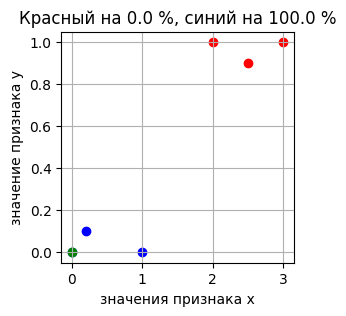

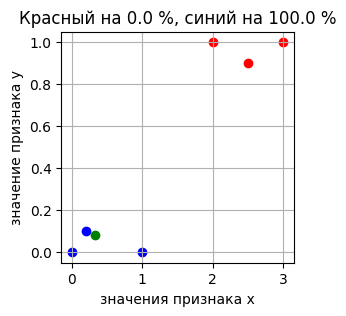

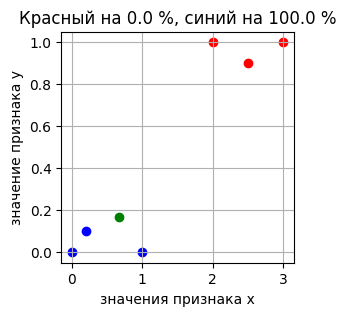

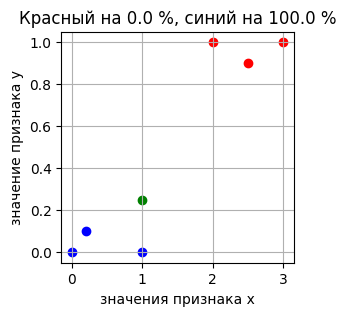

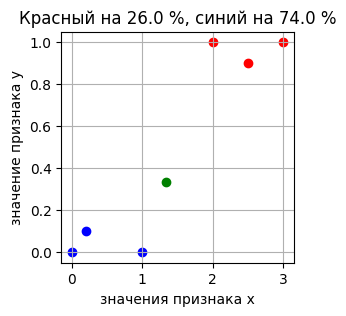

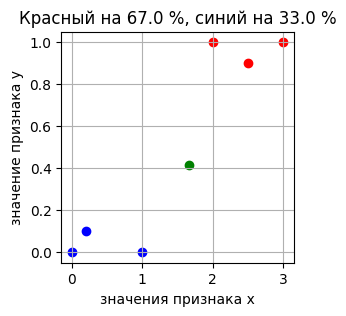

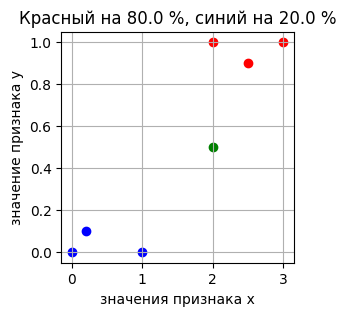

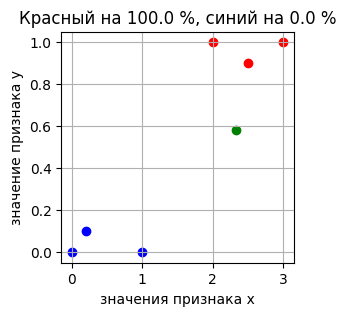

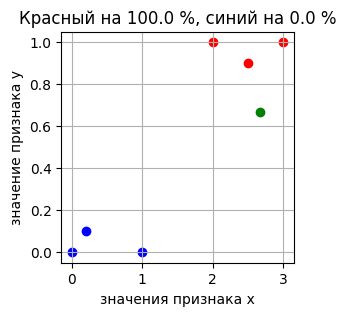

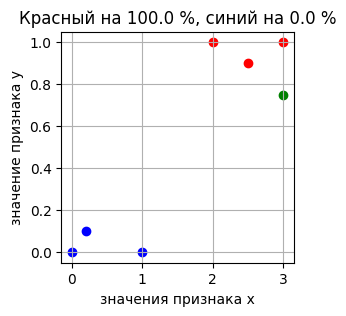

In [15]:
# И выполним код заново. Анимированный результат работы модели:
for item in np.linspace(0,3,10):
    x = item
    y = item*0.25
    plt.figure(figsize = (3,3))
    red = data[data.target == 1]
    blue = data[data.target == 0]
    red_prob = round(neigh.predict_proba([[x,y]])[0][1],2)*100 #вероятность принадлежности к красным
    blue_prob = round(neigh.predict_proba([[x,y]])[0][0],2)*100 #вероятность принадлежности к синим
    plt.title(f'Красный на {red_prob} %, синий на {blue_prob} %')
    plt.xlabel('значения признака x')
    plt.ylabel('значение признака y')
    plt.scatter(red.x.values,red.y.values ,c= 'r')
    plt.scatter(blue.x.values,blue.y.values ,c= 'b')
    plt.scatter(x,y ,c= 'g')
    plt.grid()
    plt.show()

Как видим, теперь вероятности могут принимать абсолютно любые значения и точнее предсказывать вероятность принадлежности к классу.

> **Примечание.** В случае задачи регрессии целевая метка нашего объекта определяется как среднее значение целевой метки по k ближайшим соседям.
> Расчёты ведутся точно так же, только вместо вероятности предсказания класса высчитывается **среднее по ближайшим соседям**. Также при использовании взвешенного подхода, среднее уже будет взвешенным в зависимости от расстояния до соседа: чем ближе к точке, тем больший вклад соседа.
> Предположим, целевая метка у трёх ближайших соседей в нашем случае равна 0.2, 0.3 и 0.8 соответственно, целевая метка без учёта расстояния равна (0.2+0.3+0.8)/3 = 0.43. 

### Задание 7.1

Какова вероятность принадлежности к нулевому классу объекта для модели 5 ближайших соседей без учёта расстояний до соседей, если в соседях — 4 представителя нулевого класса и 1 — единичного?

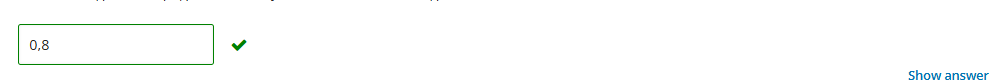

### Задание 7.2

Какова вероятность принадлежности к нулевому класса объекта для модели 5 ближайших соседей c учётом расстояний до соседей, если в соседях — 3 представителя нулевого класса и 2 — единичного?

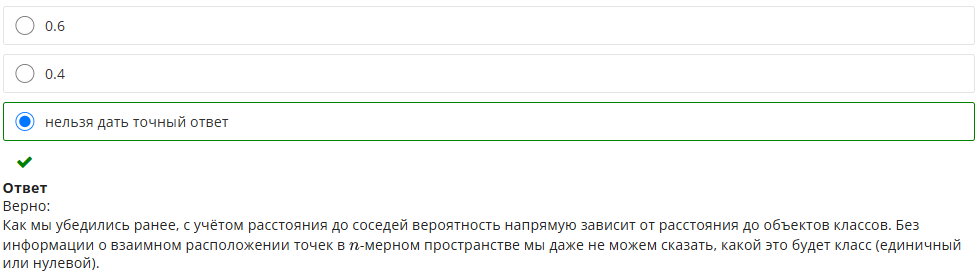

## Снижение размерности

Снижение размерности также является основной задачей *Metric Learning*. Её суть заключается в снижении размерности признакового пространства с сохранением информативности для дальнейшей работы с уменьшенным признаковым пространством в различных задачах, например задачах классификации или кластеризации. 

Тем самым, мы можем найти некоторое пространство, в котором мы можем достаточно точно разделить наши объекты по кластерам/классам или вовсе найти такое представление данных, в которых наша задача будет решаться тривиальным образом. Чаще всего это требуется для задач, в которых **ограничены ресурсы**, например для вычисления моделей на мобильных устройствах, а также для большей интерпретируемости результатов модели. 

> Тем самым мы, претерпевая небольшие потери в качестве моделей и данных, получаем гораздо менее ресурсоемкие результаты, которые можно далее визуализировать.

Основным методом снижения размерности в задачах кластеризации является **PCA** (principal component analysis, метод главных компонент), с которым мы познакомились в курсе ранее. 

Это один из самых интересных подходов в *Metric Learning*, так как мы ищем пространство меньшего размера, в котором будет максимально сохранена информация о дисперсии. В этом методе заключены преобразования пространства, поиск расстояний, проекция данных на полученный новый базис.

### Задание 7.3

Какие суждения верны про евклидово расстояние?

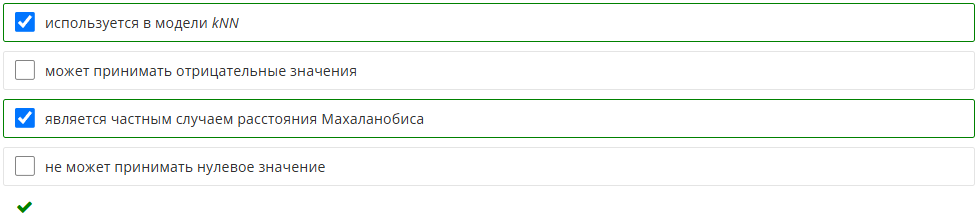

### Задание 7.4

Для чего нужен метод главных компонент PCA?

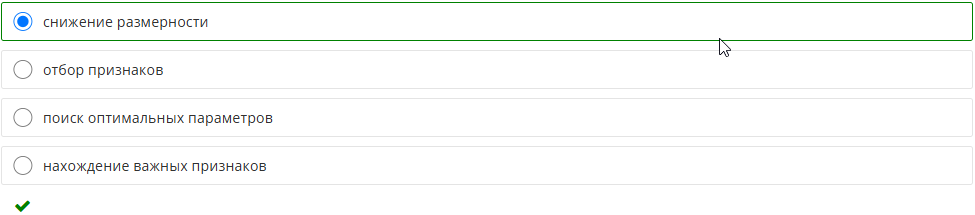

### Задание 7.5

Какие основные проблемы встречаются в кластеризации? Выберите все подходящие варианты.

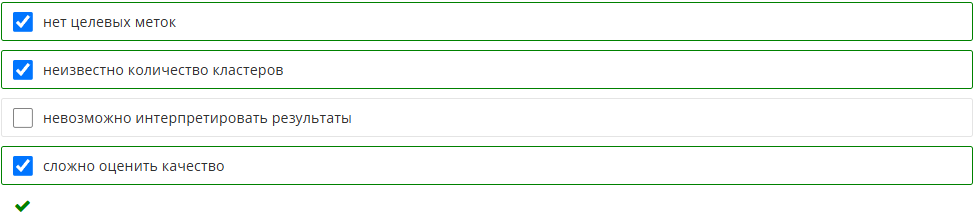

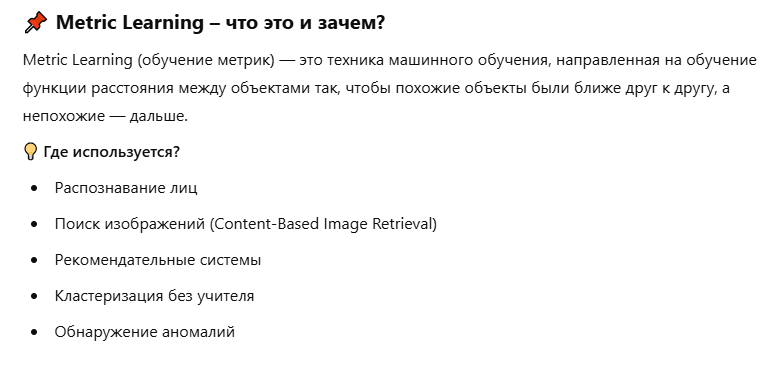
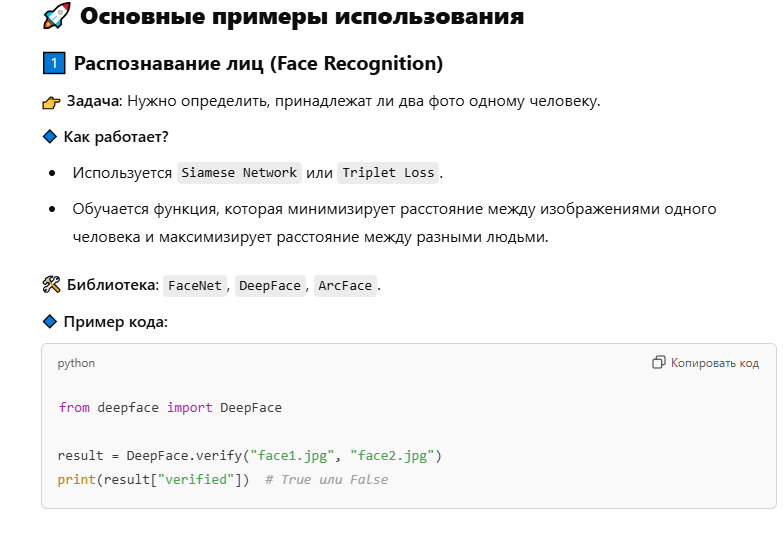
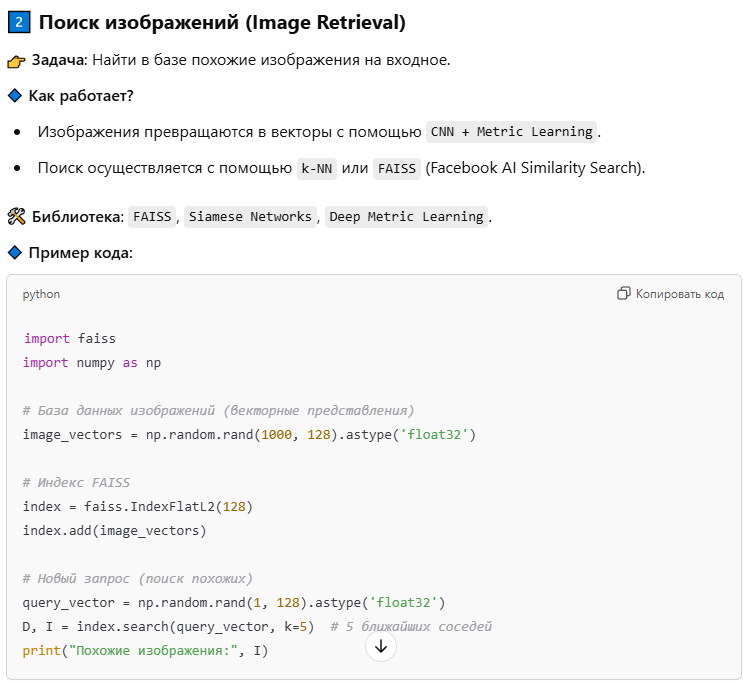
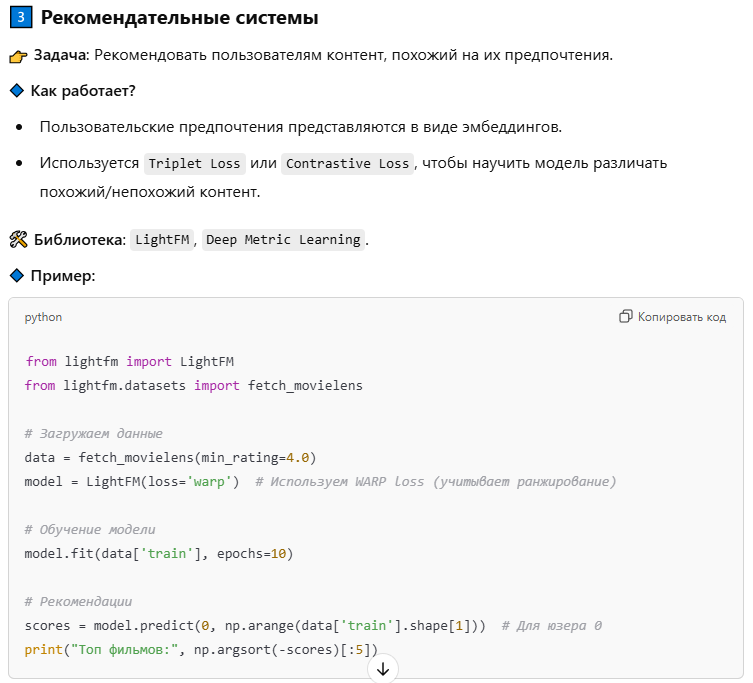
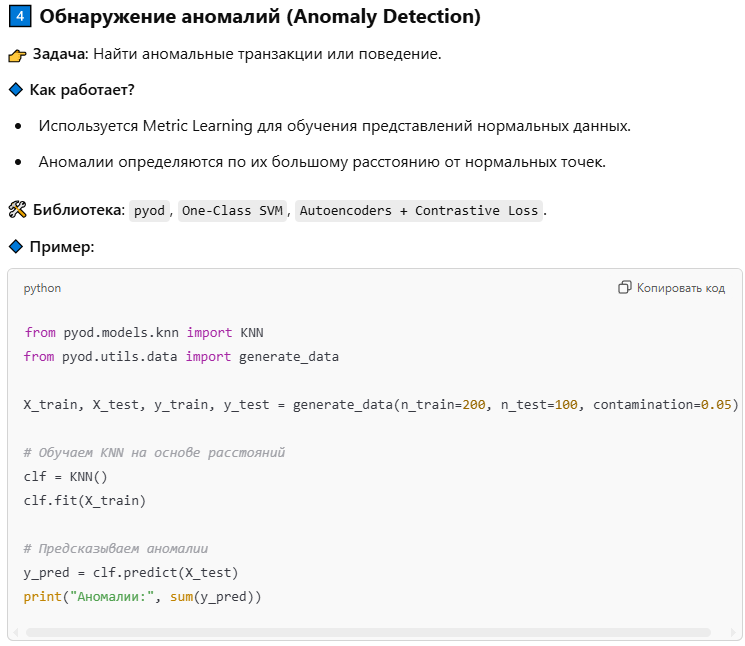
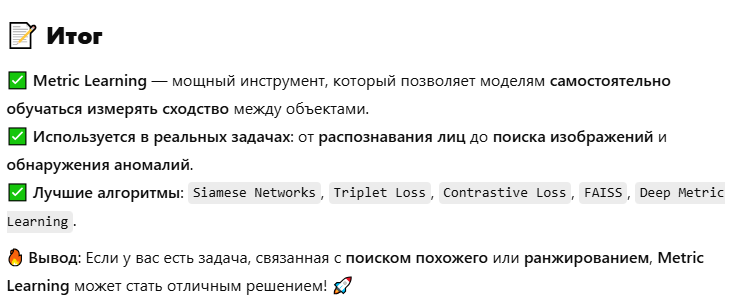
